In [31]:
# Importing necessary libraries
# General Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# ML library
from sklearn import model_selection
from sklearn import metrics
# Data Balancing Library
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# regression-multiple-methods.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

### Loading Data and Data Summary

In [32]:
algorithms = {
    'Logistic-Regression': LogisticRegression(multi_class='auto',random_state=42, max_iter=2000),
    # 'SVC-Linear': SVC(kernel='linear', probability=True,random_state=42),
    # 'SVC-RBF': SVC(kernel='rbf', probability=True,random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    # 'Neural-Network-5': MLPClassifier(hidden_layer_sizes=[5], max_iter=20000),
    # 'DecisionTree': DecisionTreeClassifier(random_state=42),
    # 'GradientBoosting': GradientBoostingClassifier(random_state=42),
    # 'KNeighbors': KNeighborsClassifier()
}
# file_path = '../outputs/features_data_grp_test_1.csv'
file_path = 'features_data_reduced.csv'
np.random.seed(42)
# load the dataset


In [33]:
def trainAndTestWithSampling(X, y, model, model_name):
  # split into train/test sets with same class ratio
  trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2,random_state=42)

  # fit model
  model.fit(trainX, trainy)
  # predict on test set
  y_pred = model.predict(testX)
  # evaluate predictions
  # Accuracy
  print(f'***************************{model_name}********************************')
  print("Accuracy:", accuracy_score(testy, y_pred))
  print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
  print("\nClassification Report:\n", classification_report(testy, y_pred))
  return trainX, testX, trainy, testy

##Program Starting Here!

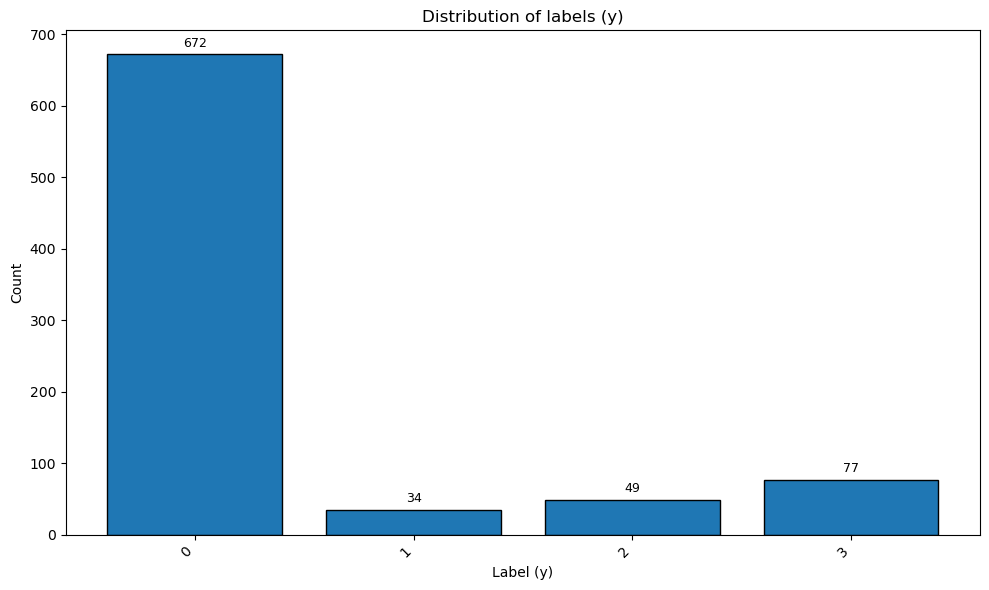

***************************Logistic-Regression********************************
Accuracy: 0.7844311377245509

Confusion Metrics
 [[130   0   0   5]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 12   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.17      0.08      0.11        13

    accuracy                           0.78       167
   macro avg       0.24      0.26      0.25       167
weighted avg       0.67      0.78      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************************RandomForest********************************
Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']

counts = df_clean['y'].value_counts().sort_index()   # or .sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(counts.index.astype(str), counts.values, color='tab:blue', edgecolor='k')
plt.xlabel('Label (y)')
plt.ylabel('Count')
plt.title('Distribution of labels (y)')
plt.xticks(rotation=45, ha='right')

# annotate counts on top of each bar
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + max(counts.values)*0.01, f'{int(h)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

for model_name, algorithm in algorithms.items():
    trainX, testX, trainy, testy = trainAndTestWithSampling(X,y,algorithm, model_name)


## PCA Program Starting Here!

In [35]:

def train_and_evaluate_with_pca(X,y,n_pcs_list):
    # Ensure X only contains the features you want to analyze with PCA

    # --- PCA Process ---
    pca_results = pd.DataFrame(columns=['Model', 'Features', 'classification_report'])
    # Step 1: Standardize the data
    # PCA is affected by scale, so standardization (mean=0, variance=1) is crucial.
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Perform PCA
    # We use all components initially to analyze total variance contribution
    pca = PCA(n_components=None) # None keeps all original dimensions as PCs
    pca.fit(X_scaled)

    # Step 3: Extract explained variance ratios
    # The explained_variance_ratio_ attribute provides the percentage of variance 
    # explained by each individual principal component.
    explained_variance = pca.explained_variance_ratio_
    
    #plot cummulative variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance) * 100, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title('Cumulative Explained Variance by Principal Components')
    plt.grid()
    plt.axhline(y=90, color='r', linestyle='--', label='90% Explained Variance')
    plt.legend()
    plt.show()

    # # --- Plotting the Contributions (Bar Chart) ---
    # plt.figure(figsize=(10, 6))
    # # Create labels for the X-axis (PC1, PC2, PC3, ...)
    # pc_labels = [f"PC{i+1}" for i in range(len(explained_variance))]

    # # Plotting the bar chart
    # plt.bar(pc_labels, explained_variance * 100, color='skyblue', edgecolor='black')
    # # Adding labels and title
    # plt.xlabel('Principal Component')
    # plt.ylabel('Percentage of Explained Variance (%)')
    # plt.title('Contribution of Each Principal Component to Total Variance')
    # plt.xticks(rotation=45)
    # plt.grid(axis='y', linestyle='--')

    for n_pcs in n_pcs_list:
        pca_n = PCA()
        X_pca = pca_n.fit_transform(X_scaled)
        X_pca_subset = X_pca[:, :n_pcs]  # Select the first `n_pcs` PCs
        print(f"\nUsing top {n_pcs} principal components:")
        print(f"Original dimensions: {X_scaled.shape[1]}")
        print(f"Reduced dimensions: {X_pca_subset.shape[1]}")
        np.random.seed(5)
        # split into train/test sets with same class ratio
        trainX, testX, trainy, testy = model_selection.train_test_split(X_pca_subset, y, test_size=0.2,random_state=42)

        for model_name, model in algorithms.items():
            # Train the model
            model.fit(trainX, trainy)
            y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
            print("Accuracy:", accuracy_score(testy, y_pred))
            print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
            print("\nClassification Report:\n", classification_report(testy, y_pred))
            # Store results
            pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
     # Train and evaluate models using original features
    trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in algorithms.items():
        model.fit(trainX, trainy)

        y_pred = model.predict(testX)
            # evaluate predictions
            # Accuracy
        print("Accuracy:", accuracy_score(testy, y_pred))
        print('\nConfusion Metrics\n', confusion_matrix(testy, y_pred))
        print("\nClassification Report:\n", classification_report(testy, y_pred))

        # Store results
        pca_results.loc[len(pca_results)] = {
                'Model': model_name,
                'Features': f'{n_pcs} PCs',
                'classification_report': classification_report(testy, y_pred)
            }
    return pca_results
    

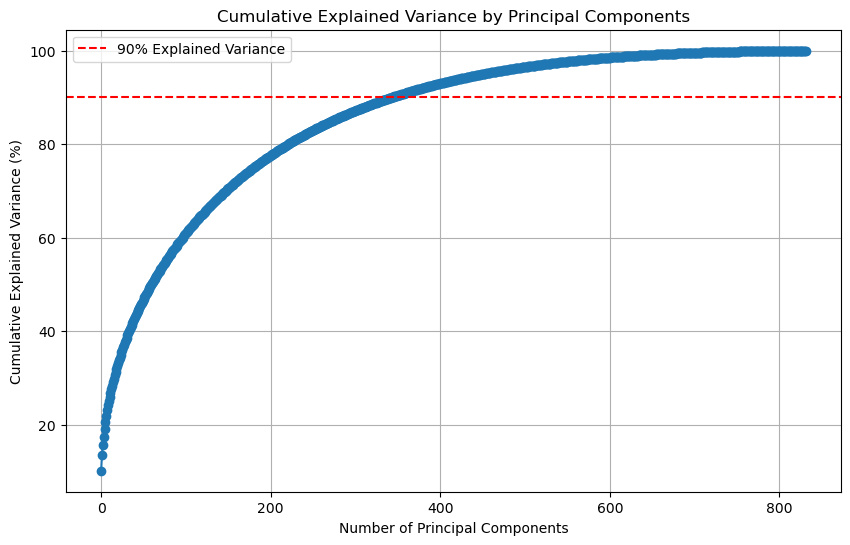


Using top 300 principal components:
Original dimensions: 1125
Reduced dimensions: 300
Accuracy: 0.7425149700598802

Confusion Metrics
 [[122   4   2   7]
 [  4   0   1   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.22      0.15      0.18        13

    accuracy                           0.74       167
   macro avg       0.26      0.26      0.26       167
weighted avg       0.67      0.74      0.70       167

Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2 

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr


Using top 350 principal components:
Original dimensions: 1125
Reduced dimensions: 350
Accuracy: 0.7425149700598802

Confusion Metrics
 [[123   3   2   7]
 [  4   0   1   0]
 [ 14   0   0   0]
 [ 12   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.12      0.08      0.10        13

    accuracy                           0.74       167
   macro avg       0.23      0.25      0.24       167
weighted avg       0.66      0.74      0.70       167

Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2 

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr


Using top 400 principal components:
Original dimensions: 1125
Reduced dimensions: 400
Accuracy: 0.7485029940119761

Confusion Metrics
 [[123   2   1   9]
 [  4   0   1   0]
 [ 14   0   0   0]
 [ 11   0   0   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.18      0.15      0.17        13

    accuracy                           0.75       167
   macro avg       0.25      0.27      0.26       167
weighted avg       0.67      0.75      0.71       167

Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2 

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr

Accuracy: 0.7844311377245509

Confusion Metrics
 [[130   0   0   5]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 12   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.17      0.08      0.11        13

    accuracy                           0.78       167
   macro avg       0.24      0.26      0.25       167
weighted avg       0.67      0.78      0.72       167



c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr

Accuracy: 0.8083832335329342

Confusion Metrics
 [[135   0   0   0]
 [  5   0   0   0]
 [ 14   0   0   0]
 [ 13   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        13

    accuracy                           0.81       167
   macro avg       0.20      0.25      0.22       167
weighted avg       0.65      0.81      0.72       167

                 Model Features  \
0  Logistic-Regression  300 PCs   
1         RandomForest  300 PCs   
2  Logistic-Regression  350 PCs   
3         RandomForest  350 PCs   
4  Logistic-Regression  400 PCs   
5         RandomForest  400 PCs   
6  Logistic-Regression  400 PCs   
7         RandomForest  400 PCs   

                               classification_report  
0                precision    recall  f1-sc

c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metr

In [36]:
n_pcs_list = [300, 350, 400]
df = pd.read_csv(file_path)
df_clean = df.dropna()
X = df_clean.drop(columns=['image',	'tile_i','tile_j','y'])
y = df_clean['y']
pca_results = train_and_evaluate_with_pca(X,y, n_pcs_list)
print(pca_results)
print("----------------------------------------------------------------\n\n")